In [0]:
pwd


'/content'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/Kaggle/

/content/gdrive/My Drive/Kaggle


In [0]:
ls

'Data Science.gdoc'  'Online Courses for Data Science .gdoc'   sat-4-full.mat


In [0]:
import scipy.io as sio

IMAGES_DATA_PATH = 'sat-4-full.mat'

def load_image_data(images_data_path=IMAGES_DATA_PATH):
    print("##########    Loading Data    ##########")    
    test = sio.loadmat(images_data_path)
    print(test)
    print("##########    Data type    ###########")
    print(type(test))
    print(test.values())
    return test

 

Training data shape :  (28, 28, 4, 400000) (4, 400000)
Testing data shape :  (28, 28, 4, 100000) (4, 100000)
Training data shape :  (400000, 28, 28, 4) (400000, 4)
Testing data shape :  (100000, 28, 28, 4) (100000, 4)
Original label 0 :  [0 0 0 1]
After conversion to categorical ( one-hot ) :  [0 0 0 1]
Train on 400000 samples, validate on 100000 samples
Epoch 1/10
400000/400000 [==============================] - 102s 255us/step - loss: 0.4103 - acc: 0.8567 - val_loss: 0.1884 - val_acc: 0.9323
Epoch 2/10
400000/400000 [==============================] - 101s 254us/step - loss: 0.1340 - acc: 0.9546 - val_loss: 0.1561 - val_acc: 0.9494
Epoch 3/10
400000/400000 [==============================] - 100s 251us/step - loss: 0.0923 - acc: 0.9686 - val_loss: 0.1227 - val_acc: 0.9518
Epoch 4/10
400000/400000 [==============================] - 101s 252us/step - loss: 0.0730 - acc: 0.9754 - val_loss: 0.0821 - val_acc: 0.9711
Epoch 5/10
400000/400000 [==============================] - 101s 253us/step

Text(0.5, 1.0, 'Accuracy Curves')

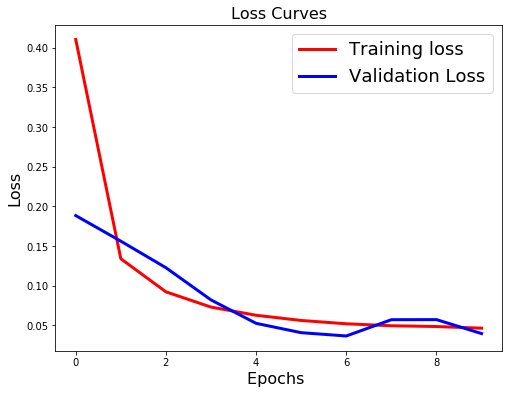

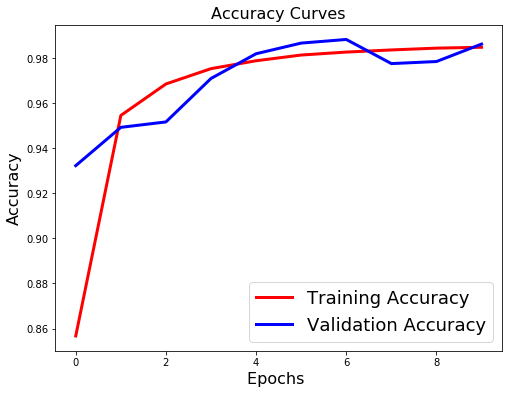

In [0]:
#checkout the data
from keras.utils import to_categorical
from keras import optimizers

#models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#helper
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


 

###############################################################################
#load the data
import scipy.io
data = scipy.io.loadmat("sat-4-full.mat")
train_images = data['train_x']
train_labels = data['train_y']

test_images = data['test_x']
test_labels = data['test_y']

####################################################################
#Checkout the data
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

#Change the dimension to fit into the model
x_train = train_images.transpose(3,0,1,2)
t_train = train_labels.transpose()

x_test = test_images.transpose(3,0,1,2)
t_test = test_labels.transpose()

print('Training data shape : ', x_train.shape, t_train.shape)
print('Testing data shape : ', x_test.shape, t_test.shape)


#Find the unique numbers from the train labels
nClasses = 4
 
#Display the change for category label using one-hot encoding
print('Original label 0 : ', t_train[0])
print('After conversion to categorical ( one-hot ) : ', t_train[0])


##################################################################
#preprocess
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
#memory error may be because entire data set could not fit into RAM

#preprocess
for t in x_train:
    t = t.astype('float32')
    t /= 255
for t in x_test:
    t = t.astype('float32')
    t /= 255
    
###########################################################################################3
def createModel():
    model = Sequential()
    model.add(Conv2D(28, (3, 3), padding='same', activation='relu', input_shape=(28 , 28 , 4)))
    model.add(Conv2D(28, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(56, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(56, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model
#################################################################################
#serialize model to JSON
def SerializeToJSON(model,model_path):
    model_json = model.to_json()
    model_json_file_name = input("Enter json filename to save :")
    model_json_file_path = model_path + model_json_file_name
    print(model_json_file_path)
    with open(model_json_file_path, "w") as json_file:
        json_file.write(model_json)

    #serialize weights to HDF5
    model_weight_json_file_name = input("Enter json weight filename to save :")
    model_json_weight_file_path = model_path + model_weight_json_file_name
    model.save_weights(model_json_weight_file_path)
    print("Saved model json to the disk")

#Training the network
model1 = createModel()

batch_size = 256
epochs = 10
rms = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
model1.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(x_train, t_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, t_test))
 
model1.evaluate(x_test, t_test)

#######################################################
#Serialize model
# model_path = "../../models/"
# SerializeToJSON(model1,model_path)

#model_path = "../models/land_classifiction_Lr0.0001_v1.yaml"
#SerializeToYAML(model,model_path)

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
print(model1)

NameError: ignored

In [0]:
print(train_images.shape)
print(train_labels.shape)

(28, 28, 4, 400000)
(4, 400000)


In [0]:
train_x = x_train.reshape(train_images.shape[3],28,28,4)

In [0]:
print(train_x.shape) 

In [0]:
#checkout the data
from keras.utils import to_categorical

#models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#helper
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



###############################################################################
#load the data
data = load_image_data()
train_images = data['train_x']
train_labels = data['train_y']

test_images = data['test_x']
test_labels = data['test_y']

####################################################################
#Checkout the data
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

#Change the dimension to fit into the model
x_train = train_images.transpose(3,0,1,2)
t_train = train_labels.transpose()

x_test = test_images.transpose(3,0,1,2)
t_test = test_labels.transpose()

print('Training data shape : ', x_train.shape, t_train.shape)
print('Testing data shape : ', x_test.shape, t_test.shape)



##########    Loading Data    ##########
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Oct 23 20:51:24 2014', '__version__': '1.0', '__globals__': [], 'annotations': array([[array(['1000'], dtype='<U4'),
        array(['barren land'], dtype='<U11')],
       [array(['0100'], dtype='<U4'), array(['trees'], dtype='<U5')],
       [array(['0010'], dtype='<U4'), array(['grassland'], dtype='<U9')],
       [array(['0001'], dtype='<U4'), array(['none'], dtype='<U4')]],
      dtype=object), 'train_x': array([[[[104, 175, 113, ..., 121, 113, 106],
         [103, 149, 114, ..., 115, 115,  96],
         [ 94, 130, 105, ...,  94,  98,  86],
         [133, 146, 163, ..., 160, 168, 150]],

        [[114, 169, 126, ..., 123, 116, 115],
         [115, 148, 131, ..., 116, 122, 111],
         [106, 130, 125, ...,  93, 105, 100],
         [145, 141, 176, ..., 165, 189, 150]],

        [[104, 166, 119, ..., 125, 112, 120],
         [110, 139, 125, ..., 120, 120, 112],
         [104

In [0]:
from PIL import Image

In [0]:
x_train[0].shape

(28, 28, 4)

In [0]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()

In [0]:
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]

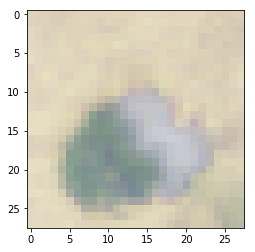

[1 0 0 0]


In [0]:
from matplotlib import pyplot as plt
plt.imshow(x_train[100], interpolation='nearest')
plt.show()
print(t_train[100])

(28, 28, 3)


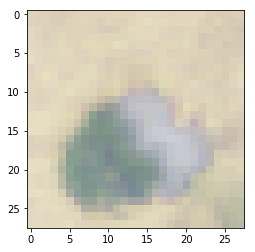

[1 0 0 0]


In [0]:
data = x_train[100]
print(data[:,:,0:3].shape)
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()
print(t_train[100])